Import packages

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns 
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_validate,GridSearchCV

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

Import dataset

In [2]:
data = pd.read_csv('term-deposit-marketing-2020.csv')

Data Exploration

In [3]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,40000.0,40.544600,9.641776,19.0,33.0,39.0,48.0,95.0
balance,40000.0,1274.277550,2903.769716,-8019.0,54.0,407.0,1319.0,102127.0
day,40000.0,16.017225,8.278127,1.0,8.0,17.0,21.0,31.0
duration,40000.0,254.824300,259.366498,0.0,100.0,175.0,313.0,4918.0
campaign,40000.0,2.882175,3.239051,1.0,1.0,2.0,3.0,63.0


Check for missing Values

In [5]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
y            0
dtype: int64

Examining Categorical Variables

In [6]:
data['job'].value_counts()

blue-collar      9383
management       8166
technician       6852
admin            4483
services         3910
retired          1437
self-employed    1414
entrepreneur     1405
unemployed       1104
housemaid        1087
student           524
unknown           235
Name: job, dtype: int64

In [7]:
data['marital'].value_counts()

married     24386
single      10889
divorced     4725
Name: marital, dtype: int64

In [8]:
data['default'].value_counts()

no     39191
yes      809
Name: default, dtype: int64

In [9]:
data['housing'].value_counts()

yes    24031
no     15969
Name: housing, dtype: int64

In [10]:
data['contact'].value_counts()

cellular     24914
unknown      12765
telephone     2321
Name: contact, dtype: int64

In [11]:
data['month'].value_counts()

may    13532
jul     6380
aug     5215
jun     4734
nov     3598
apr     2718
feb     2296
jan     1176
mar      258
oct       80
dec       13
Name: month, dtype: int64

In [12]:
data['education'].value_counts()

secondary    20993
tertiary     11206
primary       6270
unknown       1531
Name: education, dtype: int64

In [13]:
data['y'].value_counts()

no     37104
yes     2896
Name: y, dtype: int64

Note the dataset is imbalanced

ETL

In [14]:
# One hot encoding

In [15]:
data_encoded = pd.get_dummies(data, columns = ['job','marital','default','housing','contact','month','education','loan','day','month'])
data_encoded['y'] = pd.get_dummies(data_encoded['y'], columns = ['y'], drop_first=True)

In [16]:
data_encoded.head()

,age,balance,duration,campaign,y,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct
0,58,2143,261,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,44,29,151,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,33,2,76,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,47,1506,92,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,33,1,198,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [17]:
#Scale data


In [18]:
X, Y = data_encoded.drop('y',axis = 1), data_encoded['y'] 

scaler = MinMaxScaler()
X.loc[:,X.columns] = scaler.fit_transform(X.loc[:,X.columns])

D:\anaconda\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify = Y, 
                                                    random_state = 3)

#base model
rfc = RandomForestClassifier(random_state = 3)

rfc.fit(X_train, Y_train)
pred = rfc.predict(X_test)

print("Confusion Matrix\n",confusion_matrix(Y_test, pred))
print("\nAccuracy_score:",accuracy_score(Y_test, pred))

Confusion Matrix
 [[7297  124]
 [ 395  184]]

Accuracy_score: 0.935125


# Create the parameter grid
param_grid = {'penalty':['l2'],
              'C':[1,1.5,2],
              'class_weight':['balanced', None],
              'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              'max_iter':[10000000]}

# Create a GridSearchCV object
grid_lr_class = GridSearchCV(
    estimator=lr,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    refit=True, return_train_score=True)

grid_lr_class.fit(X,Y)


cv_results_df = pd.DataFrame(grid_rf_class.grid_scores_)
print(cv_results_df)

In [20]:
rfc = RandomForestClassifier(random_state = 42)
param_grid = { 
    'n_estimators': [10, 25, 50, 100, 200, 250, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2,6,10,15,20,None],
    'class_weight':['balanced',"balanced_subsample", None],
    'criterion' :['gini','entropy'],
    'random_state' : [42]
}


GS_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5,refit=True, return_train_score=True)
GS_rfc.fit(X_train,Y_train)

pred = GS_rfc.predict(X_test)

print("Confusion Matrix\n",confusion_matrix(Y_test, pred))
print("\nAccuracy_score:",accuracy_score(Y_test, pred))

print("Best parameters",GS_rfc.best_params_,"\n")

rf_best = GS_rfc.best_estimator_


Confusion Matrix
 [[7301  120]
 [ 398  181]]

Accuracy_score: 0.93525
Best parameters {'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'n_estimators': 300, 'random_state': 42} 



Best parameters {'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'n_estimators': 300, 'random_state': 42}

In [21]:
cv_results_df = pd.DataFrame(GS_rfc.cv_results_)
cv_results_df.head().T

,0,1,2,3,4
mean_fit_time,0.0594455,0.121269,0.221912,0.423063,0.828789
std_fit_time,0.0022514,0.00119909,0.00319679,0.00482718,0.00657043
mean_score_time,0.00578523,0.0091754,0.0162646,0.02813,0.0530594
std_score_time,0.000398757,0.000398946,0.000389376,0.00039669,0.000398376
param_class_weight,balanced,balanced,balanced,balanced,balanced
param_criterion,gini,gini,gini,gini,gini
param_max_depth,2,2,2,2,2
param_max_features,auto,auto,auto,auto,auto
param_n_estimators,10,25,50,100,200
param_random_state,42,42,42,42,42


Confusion Matrix [Test]
 [[7148  276]
 [ 551   25]]

Accuracy_score [Test]: 0.939375

Accuracy_score [Train]: 1.0


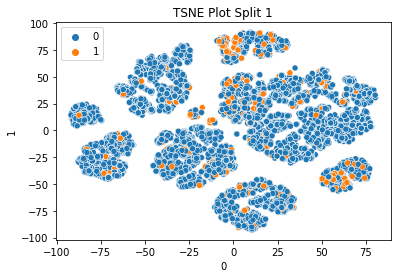

Confusion Matrix [Test]
 [[7139  278]
 [ 560   23]]

Accuracy_score [Test]: 0.935125

Accuracy_score [Train]: 1.0


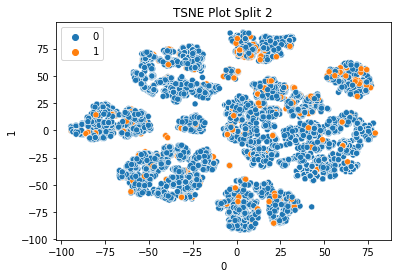

Confusion Matrix [Test]
 [[7133  276]
 [ 566   25]]

Accuracy_score [Test]: 0.9345

Accuracy_score [Train]: 1.0


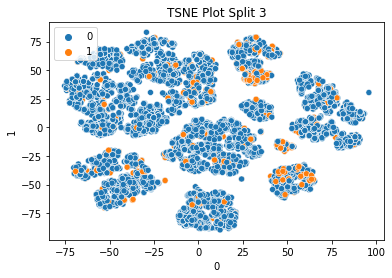

Confusion Matrix [Test]
 [[7184  280]
 [ 515   21]]

Accuracy_score [Test]: 0.93675

Accuracy_score [Train]: 1.0


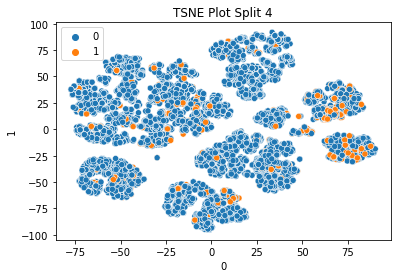

Confusion Matrix [Test]
 [[7109  281]
 [ 590   20]]

Accuracy_score [Test]: 0.9375

Accuracy_score [Train]: 1.0


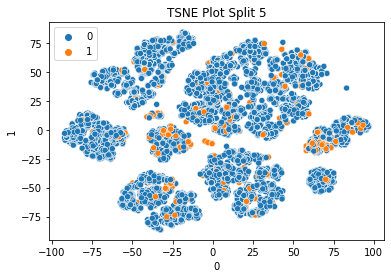

In [22]:
from sklearn.model_selection import KFold
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

kf = KFold(n_splits=5, shuffle= True, random_state = 42)


test_scores = []
train_scores = []
count = 1
for train_index, test_index in kf.split(X):

    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    Y_train, Y_test = Y[train_index], Y[test_index]
    
    rfc = RandomForestClassifier(**GS_rfc.best_params_)
    
    rfc.fit(X_train, Y_train)
    test_pred = rfc.predict(X_test)
    train_pred = rfc.predict(X_train)
    
    test_acc = accuracy_score(Y_test, test_pred)
    train_acc = accuracy_score(Y_train, train_pred)
    
    test_scores.append(test_acc)
    train_scores.append(train_acc)
    
    print("Confusion Matrix [Test]\n",confusion_matrix(Y_test, pred))
    print("\nAccuracy_score [Test]:",test_acc)
    print("\nAccuracy_score [Train]:",train_acc)

    tsne = TSNE(random_state=42).fit_transform(X_test)
    tsne = pd.DataFrame(tsne)
    sns.scatterplot(x=tsne.iloc[:,0],y=tsne.iloc[:,1],hue = Y_test.to_list(),alpha =1 )
    plt.legend(loc='upper left')
    plt.title('TSNE Plot Split '+ str(count))
    plt.show()
    
    count += 1

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

clf_knn = KNeighborsClassifier()
clf_ada = AdaBoostClassifier()
clf_svc = SVC()
rfc = RandomForestClassifier(**GS_rfc.best_params_)

clf = [clf_knn, clf_ada, clf_svc, rfc]

for c in clf:
    scores = cross_validate(c, X, Y, scoring = 'accuracy', cv=5)
    print(c,scores['test_score'])

KNeighborsClassifier() [0.926625 0.40075  0.775875 0.180875 0.6345  ]
AdaBoostClassifier() [0.928125 0.868    0.851    0.098125 0.71975 ]
SVC() [0.92775  0.192875 0.118    0.09725  0.360125]
RandomForestClassifier(n_estimators=300, random_state=42) [0.928    0.358375 0.749375 0.09725  0.1985  ]


In [26]:
from sklearn.model_selection import KFold
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

kf = KFold(n_splits=5, shuffle= True, random_state = 4)

for c in clf:
    
    test_scores = []
    train_scores = []
    print("\n",c)
    
    for train_index, test_index in kf.split(X):

        X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
        Y_train, Y_test = Y[train_index], Y[test_index]

        rfc.fit(X_train, Y_train)
        test_pred = rfc.predict(X_test)
        train_pred = rfc.predict(X_train)

        test_acc = accuracy_score(Y_test, test_pred)
        train_acc = accuracy_score(Y_train, train_pred)

        test_scores.append(test_acc)
        train_scores.append(train_acc)

    print("\nAccuracy_score [Test]:",test_scores)
    print("\nAccuracy_score [Train]:",train_scores)



 KNeighborsClassifier()

Accuracy_score [Test]: [0.94075, 0.93625, 0.932875, 0.934625, 0.935375]

Accuracy_score [Train]: [1.0, 1.0, 1.0, 1.0, 1.0]

 AdaBoostClassifier()

Accuracy_score [Test]: [0.94075, 0.93625, 0.932875, 0.934625, 0.935375]

Accuracy_score [Train]: [1.0, 1.0, 1.0, 1.0, 1.0]

 SVC()

Accuracy_score [Test]: [0.94075, 0.93625, 0.932875, 0.934625, 0.935375]

Accuracy_score [Train]: [1.0, 1.0, 1.0, 1.0, 1.0]

 RandomForestClassifier(n_estimators=300, random_state=42)

Accuracy_score [Test]: [0.94075, 0.93625, 0.932875, 0.934625, 0.935375]

Accuracy_score [Train]: [1.0, 1.0, 1.0, 1.0, 1.0]
